导入数据，拆分为csv以方便识别。

部分数据如下表：

第一部分：

| f = 1kHz                                   | R' (Ω) | VA (V) | V (V) | VR' (V) | VO (V) |
|--------------------------------------------|:------:|:------:|:-----:|:-------:|:------:|
| a) 测线圈1，无铝芯                         |   560  |  6.753 | 4.629 |  4.512  |  3.836 |
| c) 测线圈1，放入铝芯(有铝芯)               |   470  |  6.694 | 4.386 |  4.322  |  3.000 |
| b) 左右调换线圈，测线圈2，取下铝芯(无铝芯) |   630  |  6.778 | 4.570 |  4.621  |  3.492 |
| d) 测线圈2，放入铝芯(有铝芯)               |   410  |  6.641 | 4.100 |  4.088  |  3.250 |

第四部分：

| RL (Ω) | R' (Ω) | VA (V) | V (V) | VR' (V) | VO (V) |
|:------:|:------:|:------:|:-----:|:-------:|:------:|
|  1000  |   300  |  6.645 | 4.779 |  3.221  |  2.94  |

得到计算结果：
- 线圈一无铝芯：$R = 52.50\Omega$，$Z = 574.5\Omega$，$X = 572.1\Omega$，$L = 0.572H$
- 线圈二无铝芯：$R = 54.62\Omega$，$Z = 623.0\Omega$，$X = 620.6\Omega$，$L = 0.621H$
- 线圈一+铝芯：$R = 86.72\Omega$，$Z = 477.0\Omega$，$X = 469.1\Omega$，$L = 0.469H$
- 线圈二+铝芯：$R = 129.8\Omega$，$Z = 411.2\Omega$，$X = 390.2\Omega$，$L = 0.390H$

In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

p2 = pd.read_csv('p2.csv')
p2old = pd.read_csv('p2old.csv')

直线拟合：
$(R_s+R_L)^2=\omega^2 M^2 (\frac{I_P}{I_S})^2 - X_s^2$

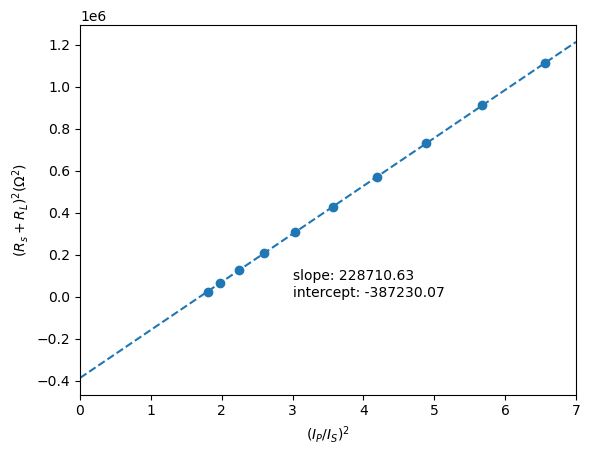

In [2]:
i_p = p2['VR\'(V)'] / p2['R\'(Ω)']
i_s = p2['VRL(V)'] / p2['RL(Ω)']
rSum = (54.62 + p2['RL(Ω)'])
fitY = np.square(rSum)
fitX = np.square(i_p / i_s)
p = np.polyfit(fitX, fitY, 1)
xAxis = np.linspace(0,7)
yAxis = p[0]*xAxis + p[1]

fig1, ax = plt.subplots()
ax.scatter(fitX, fitY)
ax.plot(xAxis, yAxis, '--')
ax.set_xlabel('$({I_P}/{I_S})^2$')
ax.set_xlim(0,7)
ax.set_ylabel('$(R_s+R_L)^2$($\Omega^2$)')
ax.text(3,0,'slope: %.2f\nintercept: %.2f' %(p[0], p[1]))
plt.savefig('fig_opt1.pdf')

用一中的求法得到等效值：$R = \frac{R'}{2}(\frac{V_A^2-V^2}{V_{R'}^2}-1)$，$Z = \frac{V}{V_{R'}}R'$，$X = \sqrt{Z^2-R^2}$

反射电阻/电感：$I_P^2R_R=I_S^2(R_S+R_L)$，$\frac{1}{2}L_RI_P^2=\frac{1}{2}L_SI_S^2$

线圈一无铝芯：$R = 52.50\Omega$，线圈二无铝芯：$R = 54.62\Omega$

In [3]:
rEff = (p2['R\'(Ω)'] / 2) * ((np.square(p2['VA(V)'])-np.square(p2['V(V)']))/np.square(p2['VR\'(V)'])-1)
zEff = (p2['V(V)'] / p2['VR\'(V)']) * p2['R\'(Ω)']
xEff = np.sqrt(np.square(zEff)-np.square(rEff))

print(rEff)
print(xEff)

0    135.587706
1    179.104214
2    208.990198
3    226.295904
4    233.664489
5    234.924857
6    232.301623
7    227.108808
8    220.450228
9    213.361439
dtype: float64
0    228.699285
1    259.390987
2    296.141063
3    333.644975
4    368.561304
5    398.504131
6    424.100287
7    445.484062
8    463.322777
9    478.083928
dtype: float64


0     85.478401
1    129.062317
2    158.364127
3    175.356381
4    182.705719
5    183.495271
6    180.325216
7    174.914170
8    168.159231
9    160.821568
dtype: float64
0    0.343307
1    0.314774
2    0.277323
3    0.239533
4    0.204573
5    0.174071
6    0.148395
7    0.127099
8    0.109391
9    0.094698
dtype: float64
0    343.306733
1    314.773777
2    277.322550
3    239.532604
4    204.572954
5    174.071314
6    148.395165
7    127.099412
8    109.391048
9     94.697800
dtype: float64


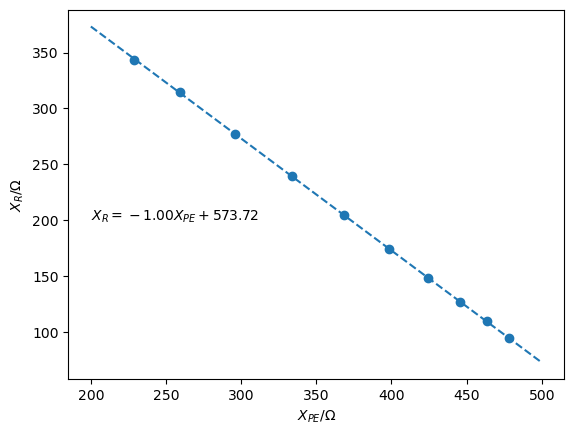

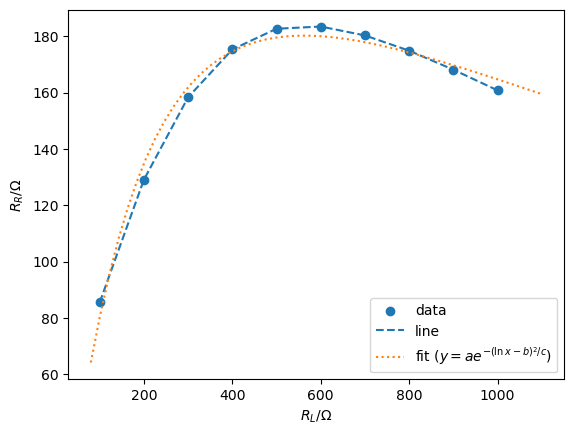

In [4]:
rRef = np.square(i_s/i_p)*(rSum)
lRef = np.square(i_s/i_p)*0.621
xRef = lRef * 1000
print(rRef)
print(lRef)
print(xRef)

fig2, ax = plt.subplots()
ax.scatter(xEff, xRef)
p = np.polyfit(xEff, xRef, 1)
xAxis = np.linspace(200,500)
yAxis = xAxis*p[0] + p[1]
ax.plot(xAxis, yAxis, '--')
ax.set_xlabel('$X_{PE}$/$\Omega$')
ax.set_ylabel('$X_R$/$\Omega$')
ax.text(200,200,'$X_R = %.2lf X_{PE} + %.2lf$' %(p[0], p[1]))
plt.savefig('fig_opt2.pdf')

fig3, ax = plt.subplots()
ax.scatter(p2['RL(Ω)'], rRef)
ax.plot(p2['RL(Ω)'], rRef, '--')
def fitFunc(x, a, b, c):
    return a*np.exp(-np.square(np.log(x)-b)/c)
[a, b, c], pcov = optimize.curve_fit(fitFunc, p2['RL(Ω)'], rRef)
xAxis = np.linspace(80,1100)
yAxis = a * np.exp(-np.square(np.log(xAxis)-b)/c)
ax.plot(xAxis, yAxis, ':')
ax.set_xlabel('$R_L$/$\Omega$')
ax.set_ylabel('$R_R$/$\Omega$')
ax.legend(['data','line','fit ($y = ae^{-(\ln{x} - b)^2/c}$)'])
plt.savefig('fig_opt3.pdf')

使用老数据重做1

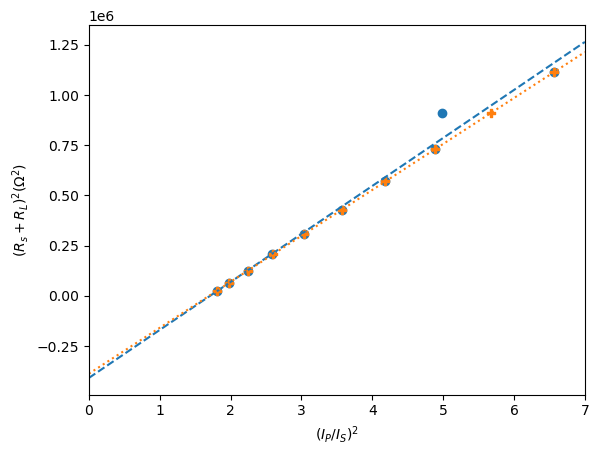

In [5]:
i_pOld = p2old['VR\'(V)'] / p2old['R\'(Ω)']
i_sOld = p2old['VRL(V)'] / p2old['RL(Ω)']
rSumOld = (54.62 + p2old['RL(Ω)'])
fitYOld = np.square(rSumOld)
fitXOld = np.square(i_pOld / i_sOld)
p = np.polyfit(fitXOld, fitYOld, 1)
xAxis = np.linspace(0,7)
yAxis = p[0]*xAxis + p[1]

fig4, ax = plt.subplots()
ax.scatter(fitXOld, fitYOld)
ax.plot(xAxis, yAxis, '--')
ax.set_xlabel('$({I_P}/{I_S})^2$')
ax.set_xlim(0,7)
ax.set_ylabel('$(R_s+R_L)^2$($\Omega^2$)')

# fitX, fitY用一开始的
p = np.polyfit(fitX, fitY, 1)
xAxis = np.linspace(0,7)
yAxis = p[0]*xAxis + p[1]

ax.scatter(fitX, fitY, marker='P')
ax.plot(xAxis, yAxis, ':')

plt.savefig('fig_old.pdf')